In [ ]:
from shakermaker.crustmodel import CrustModel
from shakermaker.ffspsource import FFSPSource # Finite Fault Stochastic Process (FFSP) source model

# Model crustal
crustal = CrustModel(3)
crustal.add_layer(15.5, 5.5, 3.14, 2.5, 1000.0, 1000.0)
crustal.add_layer(31.5, 7.0, 4.0, 2.67, 1000.0, 1000.0)
crustal.add_layer(0.0, 8.0, 4.57, 2.8, 1000.0, 1000.0)  

# Create FFSP source with all parameters from your .inp
source = FFSPSource(
    id_sf_type=8,  freq_min=0.01,  freq_max=24.0,
    fault_length=30.0,   fault_width=16.0,
    x_hypc=15.0,  y_hypc=8.0,  depth_hypc=8.0,
    xref_hypc=0.0,  yref_hypc=0.0,
    magnitude=6.7,  fc_main_1=0.09,  fc_main_2=3.0,
    rv_avg=3.0,
    ratio_rise=0.3,
    strike=358.0,  dip=40.0,  rake=113.0,
    pdip_max=15.0,   prake_max=30.0,
    nsubx=256,   nsuby=128,
    nb_taper_trbl=[5, 5, 5, 5],
    seeds=[52, 448, 4446],
    id_ran1=1,  id_ran2=1,
    angle_north_to_x=0.0,
    is_moment=3,
    crust_model=crustal,
    cleanup=True,  
    verbose=True
)

# Run FFSP
subfaults = source.run()


Working directory: /tmp/ffsp_6lx32s59
Generating input files...
Running FFSP...


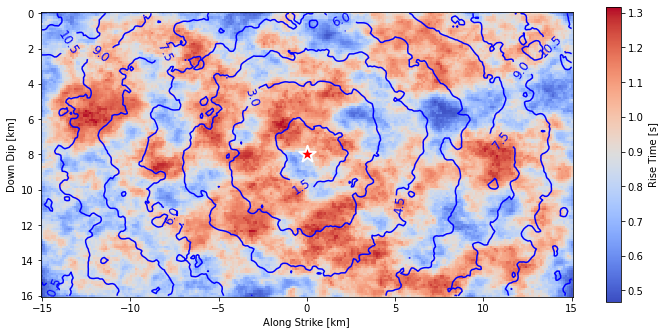

In [ ]:
# source.set_active_realization(0)  
source.plot_slip_distribution(figsize=(10, 8), cmap='coolwarm')


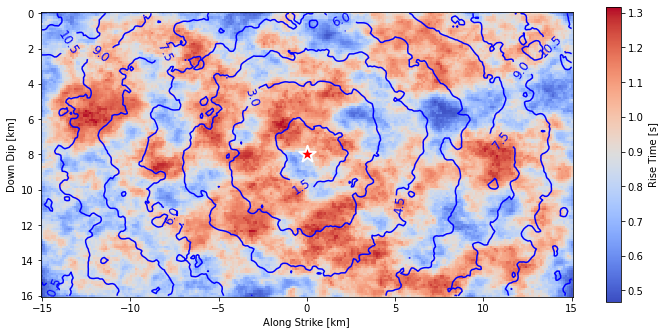

In [ ]:
source.subfaults = source.best_realization
source.plot_slip_distribution(figsize=(10, 8), cmap='coolwarm')